# CS221, Spring 2019, PS6 Schedule
Haiyuan Mei (hmei0411@stanford.edu)

## Problem 0: Warmup

### a. CSP for m buttons and n bulbs
1. There are m variables corresponding to each of the m buttons, denoted as $X_1,\dots,X_m$
2. Each of the n bulbs corresponds to a constraint, denotes as $b_1,\dots,b_n$
3. In the factor graph, each $X_j$ will connect to bulbs in $T_j$. Hence there will be more than 1 variables(buttons) connected to a contraint(bulb). 
4. The contraint uses XOR operation on each of the connected variables, meaning the bulb is only turned on when the button is pressed odd number of times.   

For example, the following code describes a CSP with 5 buttons $X_1,\dots,X_5$, and 3 bulbs $b_1,b_2,b_3$; 

// Create your own factor graph!  
// Call variable(), factor(), query() followed by an inference algorithm.  
variable('X1', [0, 1])  
variable('X2', [0, 1])  
variable('X3', [0, 1])  
variable('X4', [0, 1])  
variable('X5', [0, 1])  

factor('b1', 'S1 S2', function(a, b) {  
    return a ^ b;  
})  
factor('b2', 'S2 S3 S4', function(a, b, c) {  
    return a ^ b ^ c;  
})  
factor('b3', 'S3 S4 S5', function(a, b, c) {  
    return a ^ b ^ c;  
})  
sumVariableElimination()  

The control of each button is:
$$\begin{eqnarray*}
T_1&=&\{b1\} \\
T_2&=&\{b1,b2\} \\
T_3&=&\{b2,b3\} \\
T_4&=&\{b2,b3\} \\
T_5&=&\{b3\} \\
\end{eqnarray*}$$

The following shows the factor graph of the example and the result (Graph generated from by course demo scripts):

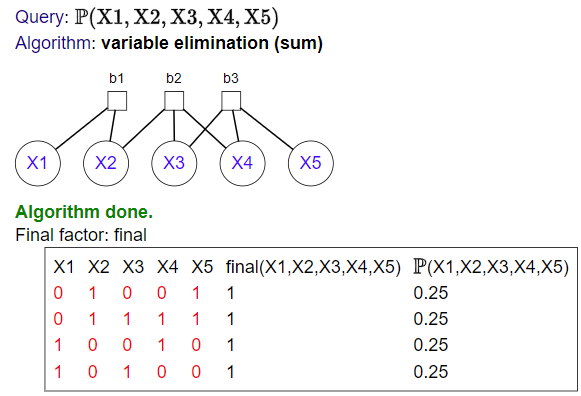

### b. Simple CSP
1. How many consistent assignments?
Answer: 2 consistent assignments, they are: [1,0,1] and [0,1,0]

2. There are at most 15 calls to backtrack if no heuristics at all. With assignment order is $X_1,X_3,X_2$, the call stack looks like following:  
backtrack({\Phi},1,{0,1})  
....backtrack({0},1,{0,1})  
........backtrack({0,0},1,{0,1})  
............backtrack({0,0,0},1,{0,1})  
............backtrack({0,0,1},1,{0,1})  
........backtrack({0,1},1,{0,1})  
............backtrack({0,1,0},1,{0,1})  
............backtrack({0,1,1},1,{0,1})  
....backtrack({1},1,{0,1})  
........backtrack({1,0},1,{0,1})  
............backtrack({1,0,0},1,{0,1})  
............backtrack({1,0,1},1,{0,1})  
........backtrack({1,1},1,{0,1})  
............backtrack({1,1,0},1,{0,1})  
............backtrack({1,1,1},1,{0,1})  


3. With AC-3 and assignment order is $X_1,X_3,X_2$ there will be only 7 backtrack calls:  
backtrack({\Phi},1,{0,1})  
....backtrack({0},1,{0,1})  
........backtrack({0,0},1,{0,1})  
............backtrack({0,0,1},1,{0,1})  
....backtrack({1},1,{0,1})  
........backtrack({1,1},1,{0,1})  
............backtrack({1,1,0},1,{0,1})  

### c.Implement create_chain_csp() (coding)  


## Problem 1: CSP solving (coding) 

## Problem 2: Handling n-ary factors

### a. Convert to unary and binary constraints
Similar to lecture notes p76, step 1 we add auxiliary variables $A_0,A_1,A_2,A_3$ such that:  
$$\begin{eqnarray*}
[A_0 &=& 0] \\
[A_i &=& A_{i-1} + X_i] \\
[A_3 &\le& K] \\
\end{eqnarray*}$$

The second step is to eliminate the ternary factor $[A_i = A_{i-1} + X_i]$ by introducing auxiliary variables $B,B_1,B_2,B_3$ where $[B_i = (A_{i-1}, A_i)]$, we have:
$$\begin{eqnarray*}
[B_1[1] &=& 0] \\
[B_i[2] &=& B_i[1] + X_i]  \\
[B_3[2] &\le& K] \\
[B_{i-1}[2] &=& B_i[1]]  \\
\end{eqnarray*}$$

The factor graph looks like:
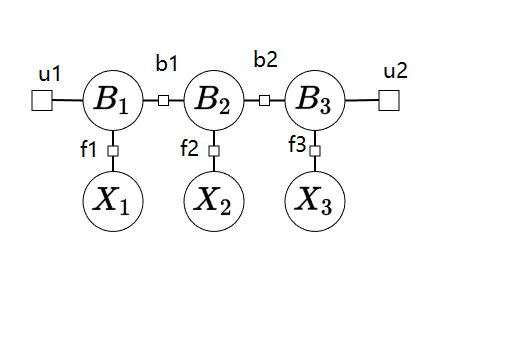

The above 2 unaries:
$$\begin{eqnarray*}
u1 = [B_1[1] &=& 0] \\
u2 = [B_3[2] &\le& K]
\end{eqnarray*}$$
and 4 binaries:

$$\begin{eqnarray*}
b1 = [B_{1}[2] &=& B_2[1]] \\
b2 = [B_{2}[2] &=& B_3[1]] \\
f1 = [B_1[2] &=& B_1[1] + X_1] \\
f2 = [B_2[2] &=& B_2[1] + X_2] \\
f3 = [B_3[2] &=& B_3[1] + X_3] \\
\end{eqnarray*}$$